In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# read your csv
df = pd.read_csv("../data/geocoded_data/merged_2021_2025.csv")

# keep only valid coordinates
df = df[df["ok"] == True]
df = df.dropna(subset=["lat", "lng"])

print(df.shape)
df.head()


C:\Users\shrey\AppData\Local\Temp\ipykernel_23328\1827977272.py:6: DtypeWarning: Columns (1,3,4,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/geocoded_data/merged_2021_2025.csv")


(443308, 19)


Opened                                        Description  \
0  2021-03-02 13:30:00  Information on How to Request an Account Adjus...   
1  2021-03-03 13:30:00  Information on How to Dispute Your Water and S...   
2  2021-03-03 13:30:00  Information on How to Dispute Your Water and S...   
3  2021-03-09 13:30:00  Street Light Bulb Replacement or Street Light ...   
4  2021-03-11 13:30:00  Right of Way Maintenance Visibility/Overgrowth...   

                                Address Zip Code        Closed Date 1  \
0     4501 Dudley LN NW, Atlanta, 30327    30327  2021-09-13 11:28:56   
1     238 peachtree cir, ATLANTA, 30309    30309  2021-07-15 12:54:21   
2  3434 Habersham Rd NW, Atlanta, 30305    30305  2022-05-26 09:54:34   
3   1160 Veltrie Circle, ATLANTA, 30311    30311  2021-04-14 15:24:37   
4     2855 elliott cir , ATLANTA, 30305    30305                  NaN   

         Closed Date 2    Status     Number               closed  \
0                  NaN  Resolved  CS0063095  2021-09-13 11:28:56   
1                  NaN  Resolved  CS0060088  2021-07-15 12:54:21   
2                  NaN  Resolved  CS0026984  2022-05-26 09:54:34   
3                  NaN  Resolved  CS0001758  2021-04-14 15:24:37   
4  2025-06-03 17:47:00  Resolved  CS0056768  2025-06-03 17:47:00   

   resolution_time_hours  has_closure_time  zip_clean  zip_int  \
0            4677.982222              True      30327  30327.0   
1            3215.405833              True      30309  30309.0   
2           10772.409444              True      30305  30305.0   
3             865.910278              True      30311  30311.0   
4           37084.283333              True      30305  30305.0   

                           address_norm        lat        lng    ok  year  \
0     4501 Dudley LN NW, Atlanta, 30327  33.877556 -84.388201  True  2021   
1     238 peachtree cir, ATLANTA, 30309  33.795376 -84.386323  True  2021   
2  3434 Habersham Rd NW, Atlanta, 30305  33.848637 -84.390632  True  2021   
3   1160 Veltrie Circle, ATLANTA, 30311  33.723403 -84.475014  True  2021   
4      2855 elliott cir, ATLANTA, 30305  33.833415 -84.367372  True  2021   

  Short Description  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [2]:
# create geometry column
geometry = [Point(xy) for xy in zip(df["lng"], df["lat"])]

gdf_points = gpd.GeoDataFrame(
    df,
    geometry=geometry,
    crs="EPSG:4326"  # WGS84 lat/lon
)

gdf_points.head()


Opened                                        Description  \
0  2021-03-02 13:30:00  Information on How to Request an Account Adjus...   
1  2021-03-03 13:30:00  Information on How to Dispute Your Water and S...   
2  2021-03-03 13:30:00  Information on How to Dispute Your Water and S...   
3  2021-03-09 13:30:00  Street Light Bulb Replacement or Street Light ...   
4  2021-03-11 13:30:00  Right of Way Maintenance Visibility/Overgrowth...   

                                Address Zip Code        Closed Date 1  \
0     4501 Dudley LN NW, Atlanta, 30327    30327  2021-09-13 11:28:56   
1     238 peachtree cir, ATLANTA, 30309    30309  2021-07-15 12:54:21   
2  3434 Habersham Rd NW, Atlanta, 30305    30305  2022-05-26 09:54:34   
3   1160 Veltrie Circle, ATLANTA, 30311    30311  2021-04-14 15:24:37   
4     2855 elliott cir , ATLANTA, 30305    30305                  NaN   

         Closed Date 2    Status     Number               closed  \
0                  NaN  Resolved  CS0063095  2021-09-13 11:28:56   
1                  NaN  Resolved  CS0060088  2021-07-15 12:54:21   
2                  NaN  Resolved  CS0026984  2022-05-26 09:54:34   
3                  NaN  Resolved  CS0001758  2021-04-14 15:24:37   
4  2025-06-03 17:47:00  Resolved  CS0056768  2025-06-03 17:47:00   

   resolution_time_hours  has_closure_time  zip_clean  zip_int  \
0            4677.982222              True      30327  30327.0   
1            3215.405833              True      30309  30309.0   
2           10772.409444              True      30305  30305.0   
3             865.910278              True      30311  30311.0   
4           37084.283333              True      30305  30305.0   

                           address_norm        lat        lng    ok  year  \
0     4501 Dudley LN NW, Atlanta, 30327  33.877556 -84.388201  True  2021   
1     238 peachtree cir, ATLANTA, 30309  33.795376 -84.386323  True  2021   
2  3434 Habersham Rd NW, Atlanta, 30305  33.848637 -84.390632  True  2021   
3   1160 Veltrie Circle, ATLANTA, 30311  33.723403 -84.475014  True  2021   
4      2855 elliott cir, ATLANTA, 30305  33.833415 -84.367372  True  2021   

  Short Description                    geometry  
0               NaN   POINT (-84.3882 33.87756)  
1               NaN  POINT (-84.38632 33.79538)  
2               NaN  POINT (-84.39063 33.84864)  
3               NaN   POINT (-84.47501 33.7234)  
4               NaN  POINT (-84.36737 33.83342)

In [3]:
import os
import requests
import zipfile

url = "https://www2.census.gov/geo/tiger/TIGER2020/TABBLOCK20/tl_2020_13_tabblock20.zip"
zip_path = "tl_2020_13_tabblock20.zip"
out_dir = "tl_2020_13_tabblock20"

# download
if not os.path.exists(zip_path):
    r = requests.get(url, stream=True)
    r.raise_for_status()
    with open(zip_path, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

# unzip
if not os.path.exists(out_dir):
    os.makedirs(out_dir, exist_ok=True)
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(out_dir)

# read shapefile
shp_path = os.path.join(out_dir, "tl_2020_13_tabblock20.shp")
blocks_ga = gpd.read_file(shp_path)

print(blocks_ga.columns)


Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLOCKCE20', 'GEOID20',
       'GEOIDFQ20', 'NAME20', 'MTFCC20', 'UR20', 'UACE20', 'FUNCSTAT20',
       'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'HOUSING20', 'POP20',
       'geometry'],
      dtype='object')


In [4]:
import requests
import zipfile
import os

url_place = "https://www2.census.gov/geo/tiger/TIGER2020/PLACE/tl_2020_13_place.zip"
zip_place = "tl_2020_13_place.zip"
out_place = "tl_2020_13_place"

# 1) Download
if not os.path.exists(zip_place):
    print("Downloading PLACE shapefile...")
    r = requests.get(url_place, stream=True)
    r.raise_for_status()
    with open(zip_place, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)

# 2) Unzip
if not os.path.exists(out_place):
    os.makedirs(out_place, exist_ok=True)
    with zipfile.ZipFile(zip_place, "r") as z:
        z.extractall(out_place)

print("Download complete.")


Download complete.


In [5]:
import geopandas as gpd
import os

place_path = os.path.join(out_place, "tl_2020_13_place.shp")
places = gpd.read_file(place_path)

print(places.head())


  STATEFP PLACEFP   PLACENS    GEOID         NAME          NAMELSAD LSAD  \
0      13   22752  02406378  1322752       Dexter       Dexter town   43   
1      13   24488  02403513  1324488       Dudley       Dudley city   25   
2      13   25300  02403532  1325300  East Dublin  East Dublin city   25   
3      13   52500  02406183  1352500     Montrose     Montrose town   43   
4      13   36696  02403802  1336696       Harlem       Harlem city   25   

  CLASSFP PCICBSA PCINECTA  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT  \
0      C1       N        N  G4110        A   1987890   47045  +32.4331950   
1      C1       N        N  G4110        A   8827898   33640  +32.5334829   
2      C1       N        N  G4110        A  10925435  507602  +32.5469249   
3      C1       N        N  G4110        A   4181073   16200  +32.5592295   
4      C1       N        N  G4110        A  16748090   42274  +33.4353393   

       INTPTLON                                           geometry  
0  -083.059

<Axes: >

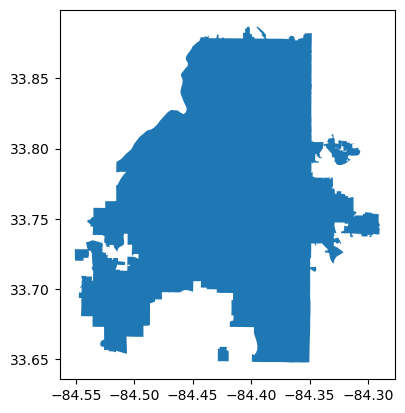

In [6]:
atlanta_city = places[places["NAME"] == "Atlanta"].copy()

atlanta_city.plot()


In [7]:
# Make sure CRS matches
blocks_ga = blocks_ga.to_crs(atlanta_city.crs)

# Clip blocks using Atlanta boundary
atlanta_blocks = gpd.clip(blocks_ga, atlanta_city)

print("Total Atlanta blocks:", len(atlanta_blocks))


Total Atlanta blocks: 6575


<Axes: >

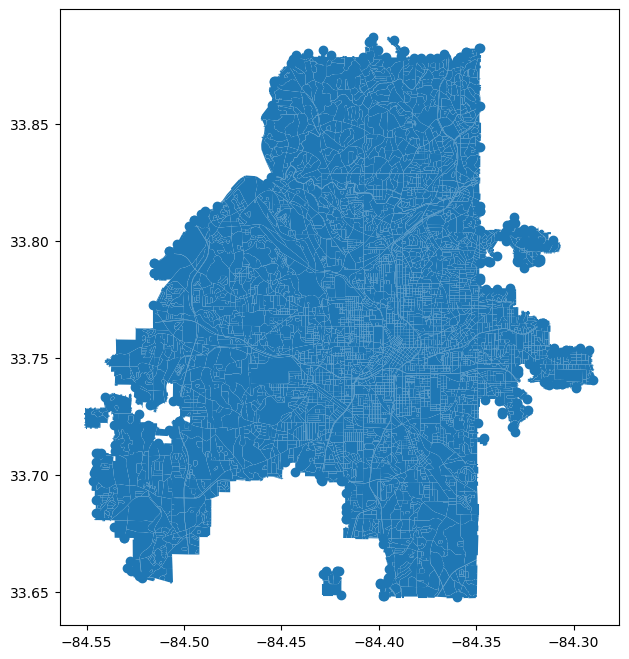

In [8]:
atlanta_blocks.plot(figsize=(8,8))


In [9]:
# Georgia State Plane West (feet)
atlanta_blocks = atlanta_blocks.to_crs("EPSG:2240")
gdf_points = gdf_points.to_crs("EPSG:2240")


In [10]:
joined = gpd.sjoin(
    gdf_points,
    atlanta_blocks,
    how="left",
    predicate="within"
)


In [11]:
print(joined["GEOID20"].isna().sum())


6066


In [12]:
print(len(gdf_points))


443308


In [13]:
print(gdf_points.crs)
print(atlanta_blocks.crs)


EPSG:2240
EPSG:2240


<Axes: >

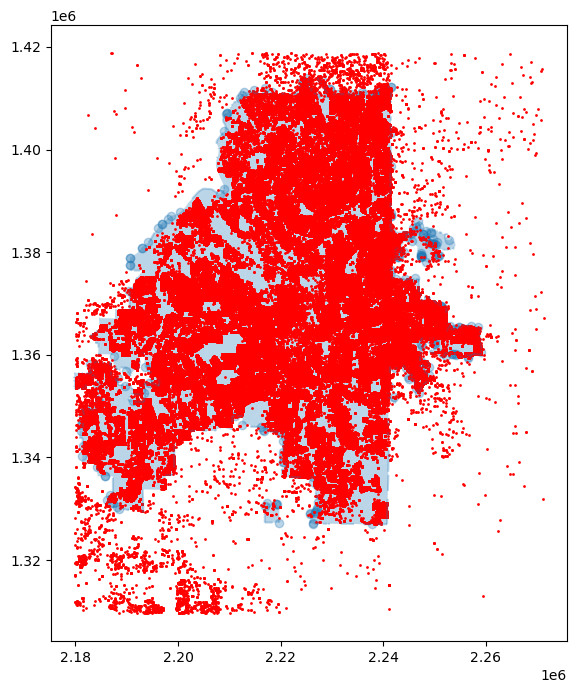

In [14]:
base = atlanta_blocks.plot(figsize=(8,8), alpha=0.3)
gdf_points.plot(ax=base, markersize=1, color="red")


In [15]:
points_in_city = gpd.sjoin(
    gdf_points,
    atlanta_city.to_crs(gdf_points.crs),
    predicate="within",
    how="inner"
)

print("Points inside Atlanta:", len(points_in_city))


Points inside Atlanta: 437242


In [16]:
atlanta_boundary = atlanta_city.to_crs(gdf_points.crs)

gdf_points_atl = gdf_points[
    gdf_points.within(atlanta_boundary.geometry.iloc[0])
].copy()

print(len(gdf_points_atl))  # should be 437242


437242


In [17]:
atlanta_blocks = atlanta_blocks.to_crs("EPSG:2240")
gdf_points_atl = gdf_points_atl.to_crs("EPSG:2240")


In [18]:
joined = gpd.sjoin(
    gdf_points_atl,
    atlanta_blocks,
    how="left",
    predicate="within"
)

print("Unmatched after filtering:",
      joined["GEOID20"].isna().sum())


Unmatched after filtering: 0


In [19]:
block_counts = (
    joined.groupby("GEOID20")
    .size()
    .reset_index(name="complaint_count")
)

atlanta_blocks = atlanta_blocks.merge(
    block_counts,
    on="GEOID20",
    how="left"
)

atlanta_blocks["complaint_count"] = (
    atlanta_blocks["complaint_count"].fillna(0)
)


In [20]:
print("Total blocks:", len(atlanta_blocks))
print("Blocks with complaints:",
      (atlanta_blocks["complaint_count"] > 0).sum())


Total blocks: 6575
Blocks with complaints: 5414


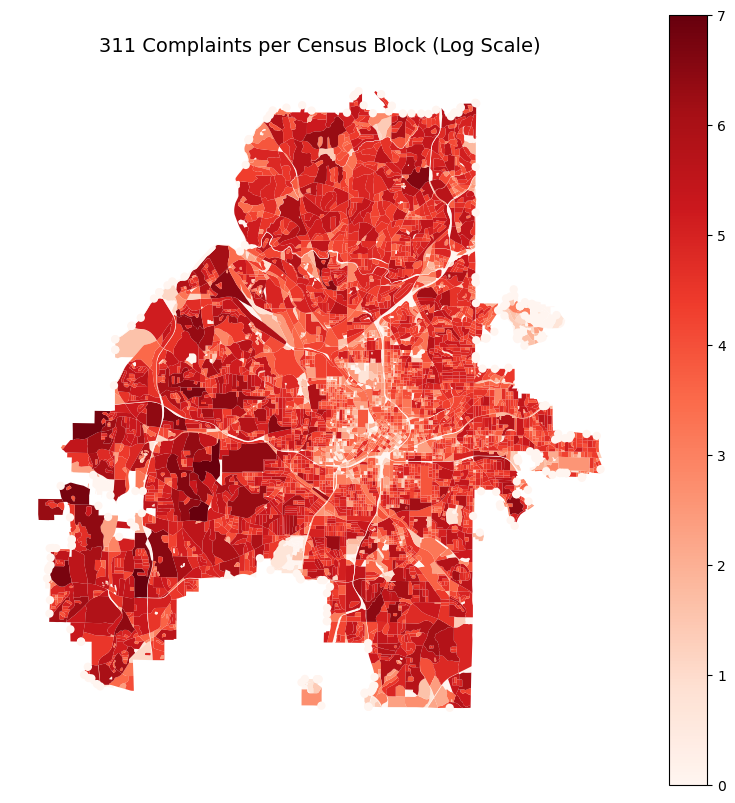

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# log transform
atlanta_blocks["log_count"] = np.log1p(atlanta_blocks["complaint_count"])

fig, ax = plt.subplots(figsize=(10,10))

atlanta_blocks.plot(
    column="log_count",
    cmap="Reds",
    linewidth=0,
    legend=True,
    ax=ax
)

ax.set_title("311 Complaints per Census Block (Log Scale)", fontsize=14)
ax.axis("off")

plt.show()


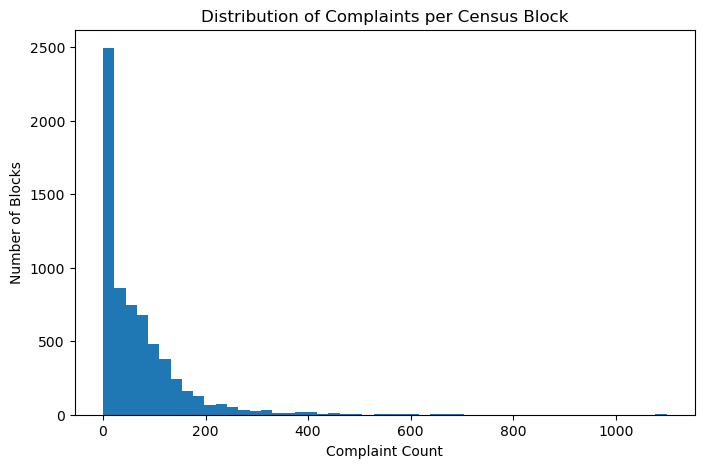

In [22]:
plt.figure(figsize=(8,5))

plt.hist(
    atlanta_blocks["complaint_count"],
    bins=50
)

plt.title("Distribution of Complaints per Census Block")
plt.xlabel("Complaint Count")
plt.ylabel("Number of Blocks")

plt.show()


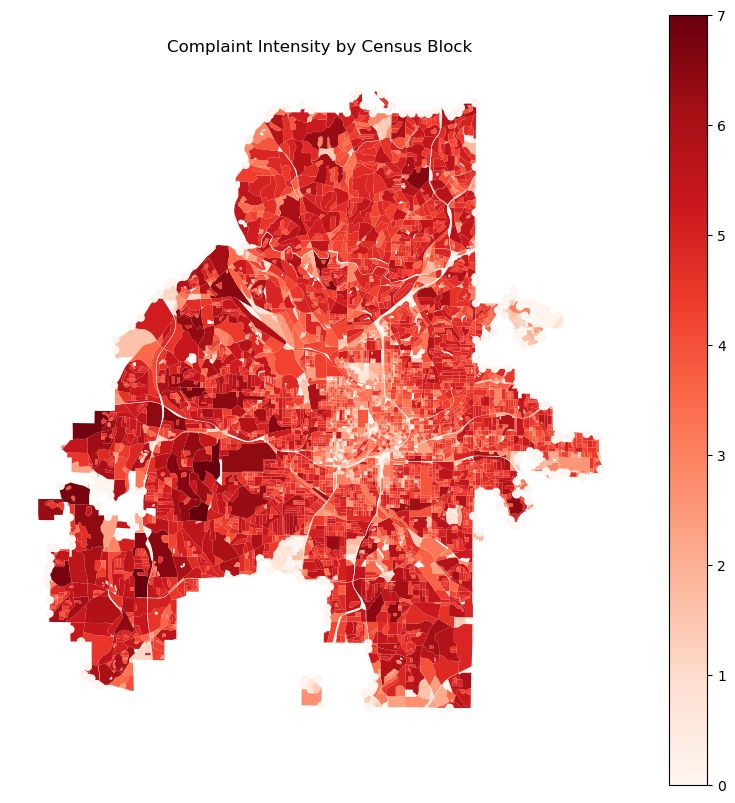

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

atlanta_blocks.plot(
    column="log_count",
    cmap="Reds",
    edgecolor="none",
    legend=True,
    ax=ax
)

ax.set_title("Complaint Intensity by Census Block")
ax.axis("off")

plt.show()


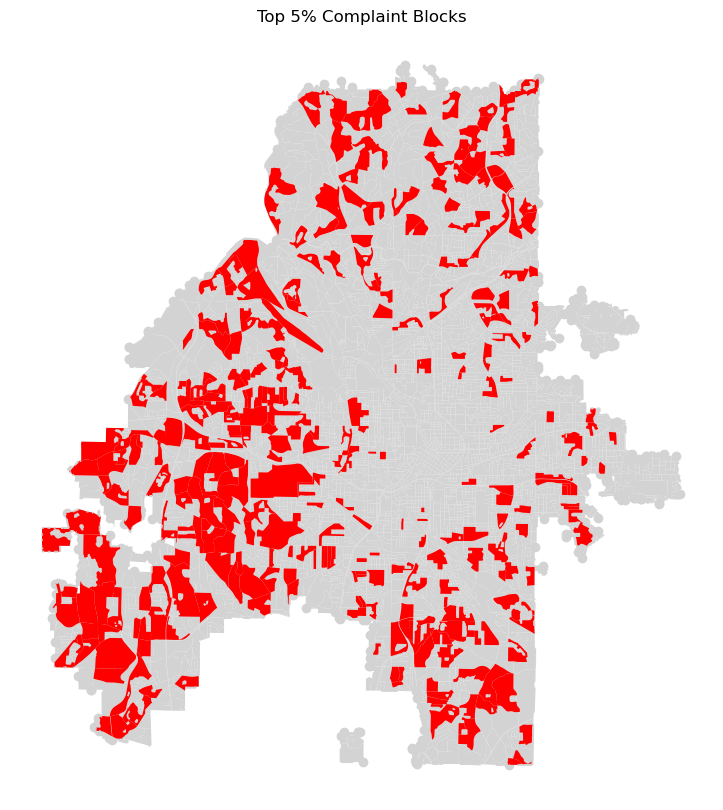

In [24]:
threshold = atlanta_blocks["complaint_count"].quantile(0.95)

high_blocks = atlanta_blocks[
    atlanta_blocks["complaint_count"] >= threshold
]

fig, ax = plt.subplots(figsize=(10,10))

atlanta_blocks.plot(
    color="lightgrey",
    ax=ax
)

high_blocks.plot(
    color="red",
    ax=ax
)

ax.set_title("Top 5% Complaint Blocks")
ax.axis("off")

plt.show()


<Axes: >

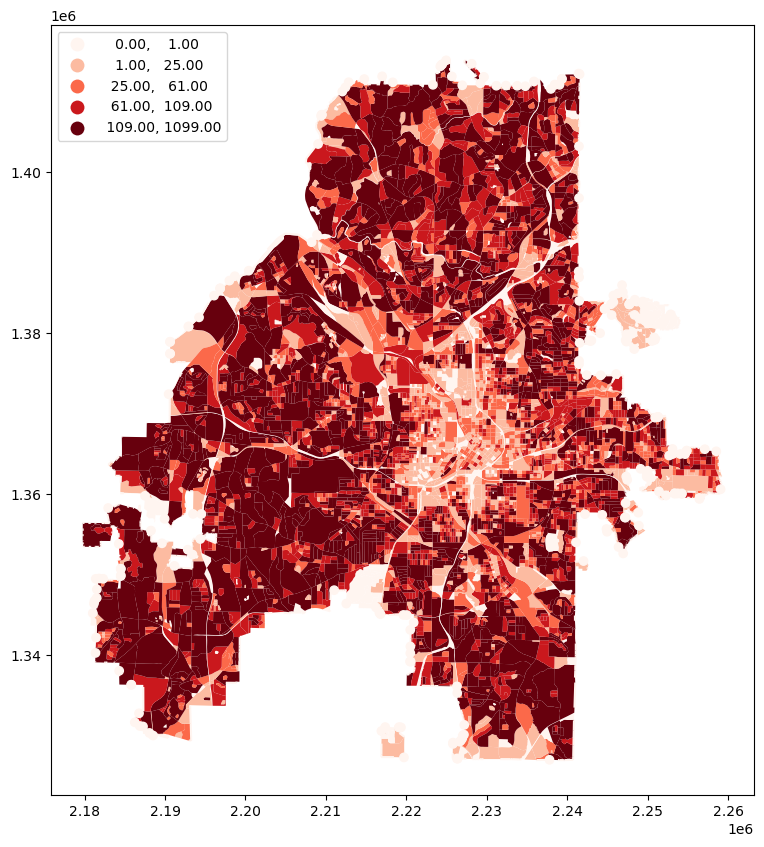

In [25]:
atlanta_blocks.plot(
    column="complaint_count",
    scheme="quantiles",
    k=5,
    cmap="Reds",
    legend=True,
    figsize=(10,10)
)


In [26]:
# Normalised based on area

atlanta_blocks["area_acres"] = atlanta_blocks.geometry.area / 43560
atlanta_blocks = atlanta_blocks[
    atlanta_blocks["area_acres"] > 0.01
].copy()

atlanta_blocks["service_burden_area"] = (
    atlanta_blocks["complaint_count"] /
    atlanta_blocks["area_acres"]
)

atlanta_blocks["log_burden"] = np.log1p(
    atlanta_blocks["service_burden_area"]
)

min_val = atlanta_blocks["log_burden"].min()
max_val = atlanta_blocks["log_burden"].max()

atlanta_blocks["burden_score"] = (
    (atlanta_blocks["log_burden"] - min_val) /
    (max_val - min_val)
)


In [27]:
atlanta_blocks["burden_score"].describe()

count    6106.000000
mean        0.354410
std         0.203413
min         0.000000
25%         0.201763
50%         0.394873
75%         0.510558
max         1.000000
Name: burden_score, dtype: float64

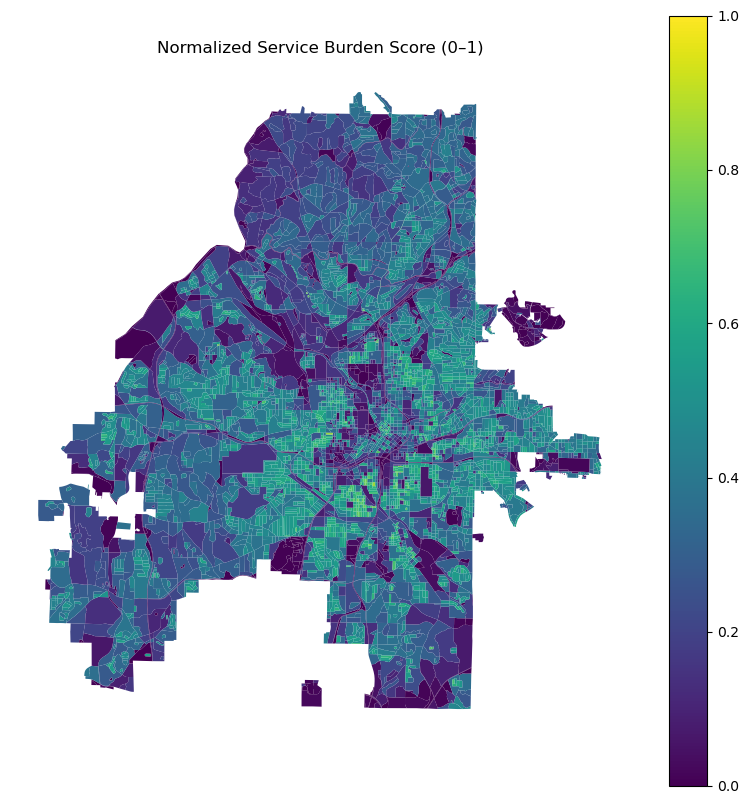

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

atlanta_blocks.plot(
    column="burden_score",
    cmap="viridis",
    linewidth=0,
    legend=True,
    ax=ax
)

ax.set_title("Normalized Service Burden Score (0–1)")
ax.axis("off")

plt.show()


In [29]:
#Deep copy of the base data - atlanta_blocks - used for 5 year analysis
atlanta_blocks_base = atlanta_blocks[[
    "GEOID20",
    "geometry",
    "area_acres",
    "POP20"
]].copy()


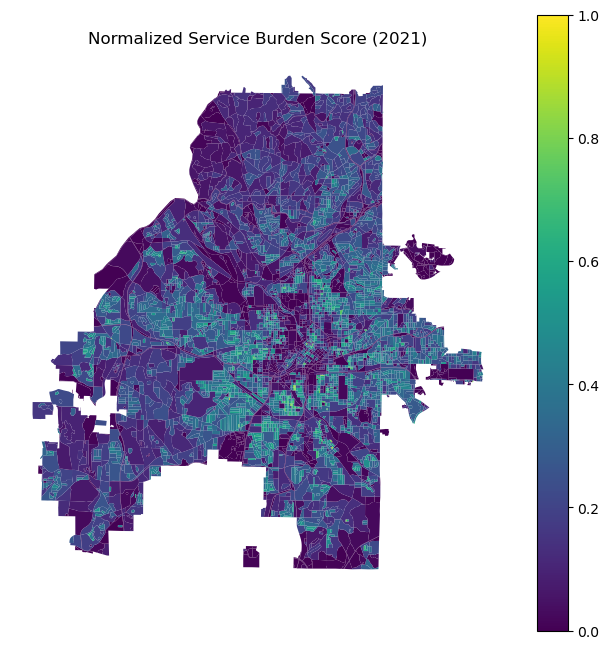

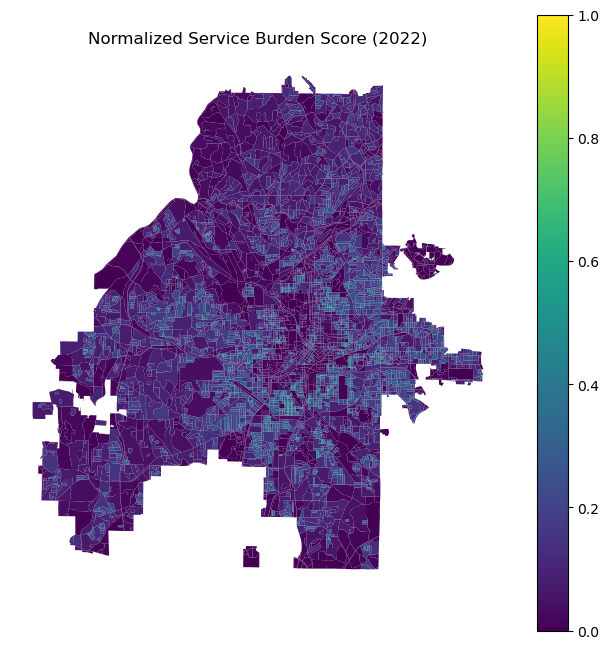

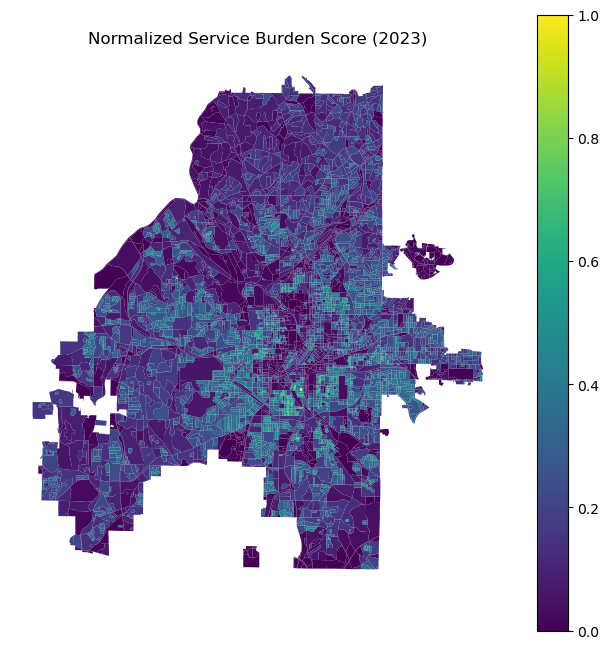

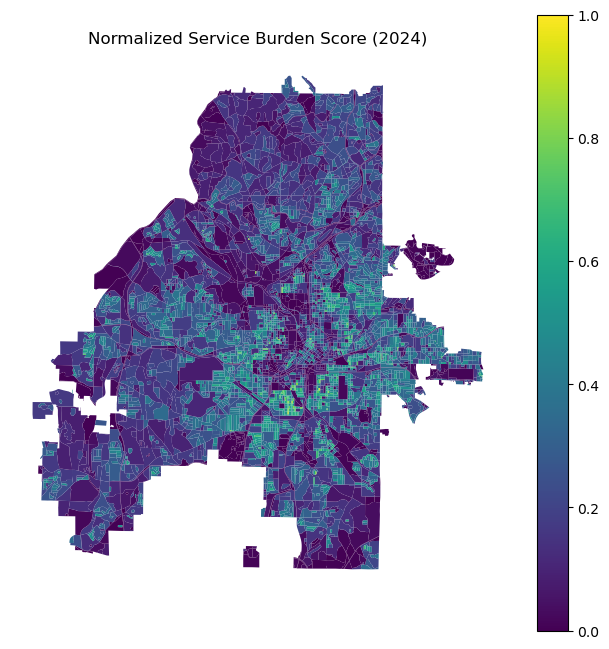

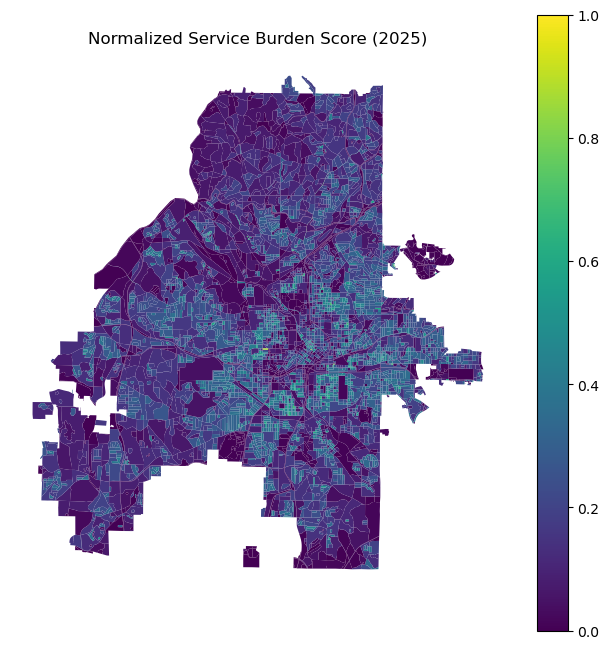

In [30]:
# Year wise normalization:

years = sorted(gdf_points_atl["year"].unique())

for yr in years:
    
    # 1️⃣ Filter year
    yearly_points = gdf_points_atl[gdf_points_atl["year"] == yr]
    
    # 2️⃣ Spatial join
    joined_year = gpd.sjoin(
        yearly_points,
        atlanta_blocks_base,
        how="left",
        predicate="within"
    )
    
    # 3️⃣ Count complaints per block
    counts = (
        joined_year.groupby("GEOID20")
        .size()
        .reset_index(name="complaint_count")
    )
    
    # 4️⃣ Merge with CLEAN base
    blocks_year = atlanta_blocks_base.merge(
        counts,
        on="GEOID20",
        how="left"
    )
    
    blocks_year["complaint_count"] = (
        blocks_year["complaint_count"].fillna(0)
    )
    
    # 5️⃣ Compute burden
    blocks_year["burden"] = (
        blocks_year["complaint_count"] /
        blocks_year["area_acres"]
    )
    
    # 6️⃣ Log transform
    blocks_year["log_burden"] = np.log1p(blocks_year["burden"])
    
    # 7️⃣ Min–max scale within year
    min_val = blocks_year["log_burden"].min()
    max_val = blocks_year["log_burden"].max()
    
    blocks_year["score"] = (
        (blocks_year["log_burden"] - min_val) /
        (max_val - min_val)
    )
    
    # 8️⃣ Plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    blocks_year.plot(
        column="score",
        cmap="viridis",
        linewidth=0,
        legend=True,
        ax=ax
    )
    
    ax.set_title(f"Normalized Service Burden Score ({yr})")
    ax.axis("off")
    
    plt.show()




C:\Users\shrey\AppData\Local\Temp\ipykernel_23328\1728448276.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


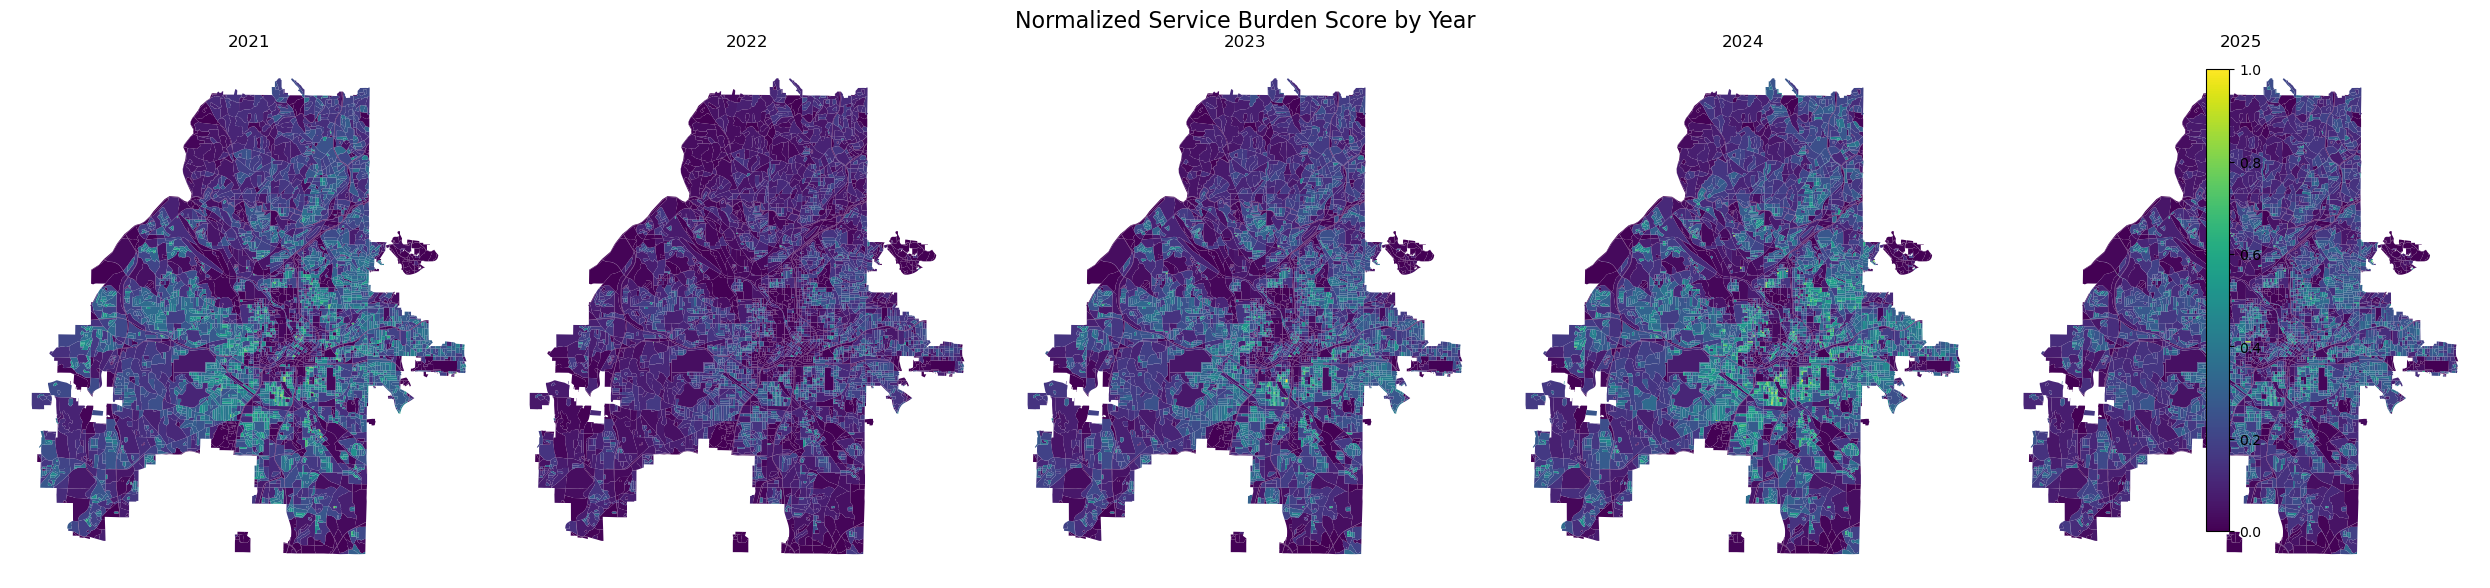

In [31]:
#Different plotting

years = sorted(gdf_points_atl["year"].unique())
n_years = len(years)

fig, axes = plt.subplots(
    1,                 # 1 row
    n_years,           # columns = number of years
    figsize=(5*n_years, 6)
)

# If only one year, make axes iterable
if n_years == 1:
    axes = [axes]

for i, yr in enumerate(years):
    
    yearly_points = gdf_points_atl[gdf_points_atl["year"] == yr]
    
    joined_year = gpd.sjoin(
        yearly_points,
        atlanta_blocks_base,
        how="left",
        predicate="within"
    )
    
    counts = (
        joined_year.groupby("GEOID20")
        .size()
        .reset_index(name="complaint_count")
    )
    
    blocks_year = atlanta_blocks_base.merge(
        counts,
        on="GEOID20",
        how="left"
    )
    
    blocks_year["complaint_count"] = (
        blocks_year["complaint_count"].fillna(0)
    )
    
    blocks_year["burden"] = (
        blocks_year["complaint_count"] /
        blocks_year["area_acres"]
    )
    
    blocks_year["log_burden"] = np.log1p(blocks_year["burden"])
    
    # Min–max scaling within year
    min_val = blocks_year["log_burden"].min()
    max_val = blocks_year["log_burden"].max()
    
    blocks_year["score"] = (
        (blocks_year["log_burden"] - min_val) /
        (max_val - min_val)
    )
    
    # Plot in subplot
    blocks_year.plot(
        column="score",
        cmap="viridis",
        linewidth=0,
        legend=False,
        ax=axes[i]
    )
    
    axes[i].set_title(str(yr))
    axes[i].axis("off")

# One shared colorbar
sm = plt.cm.ScalarMappable(cmap="viridis")
sm.set_array([])

fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.02)

plt.suptitle("Normalized Service Burden Score by Year", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
#### Calculating response score

In [32]:
#assign scores right now
gdf_points_atl["response_score"] = np.select(
    [
        gdf_points_atl["resolution_time_hours"] <= 72,
        gdf_points_atl["resolution_time_hours"].between(72, 168),
        gdf_points_atl["resolution_time_hours"] > 168
    ],
    [10, 5, 1],
    default=np.nan
)
gdf_points_atl["response_score"].describe()


count    437242.000000
mean          6.983867
std           3.964389
min           1.000000
25%           1.000000
50%          10.000000
75%          10.000000
max          10.000000
Name: response_score, dtype: float64

In [33]:
#Join with our block data
joined_all = gpd.sjoin(
    gdf_points_atl,
    atlanta_blocks[["GEOID20", "geometry"]],
    how="left",
    predicate="within"
)


In [34]:
#Compute mean response per block
block_response = (
    joined_all.groupby("GEOID20")["response_score"]
    .mean()
    .reset_index(name="mean_response_score")
)


In [35]:
#Merge into 5 year dataset
atlanta_blocks = atlanta_blocks.merge(
    block_response,
    on="GEOID20",
    how="left"
)

#Response score normalization
min_resp = atlanta_blocks["mean_response_score"].min(skipna=True)
max_resp = atlanta_blocks["mean_response_score"].max(skipna=True)

atlanta_blocks["response_score_norm"] = (
    (atlanta_blocks["mean_response_score"] - min_resp) /
    (max_resp - min_resp)
)



In [36]:
atlanta_blocks["mean_response_score"].describe()


count    5414.000000
mean        6.905349
std         1.399448
min         1.000000
25%         6.169685
50%         7.000000
75%         7.693738
max        10.000000
Name: mean_response_score, dtype: float64

In [37]:
atlanta_blocks["response_score_norm"].describe()

count    5414.000000
mean        0.656150
std         0.155494
min         0.000000
25%         0.574409
50%         0.666667
75%         0.743749
max         1.000000
Name: response_score_norm, dtype: float64

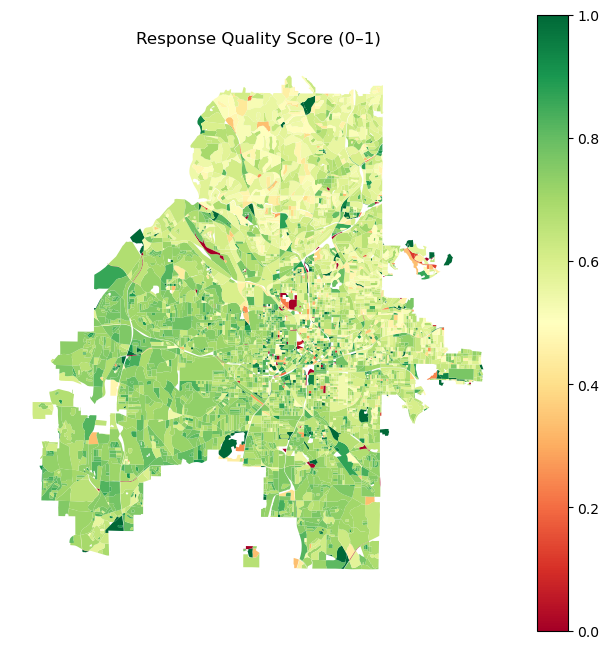

In [40]:
fig, ax = plt.subplots(figsize=(8,8))

atlanta_blocks.plot(
    column="response_score_norm",
    cmap="RdYlGn",
    linewidth=0,
    legend=True,
    ax=ax
)

ax.set_title("Response Quality Score (0–1)")
ax.axis("off")

plt.show()


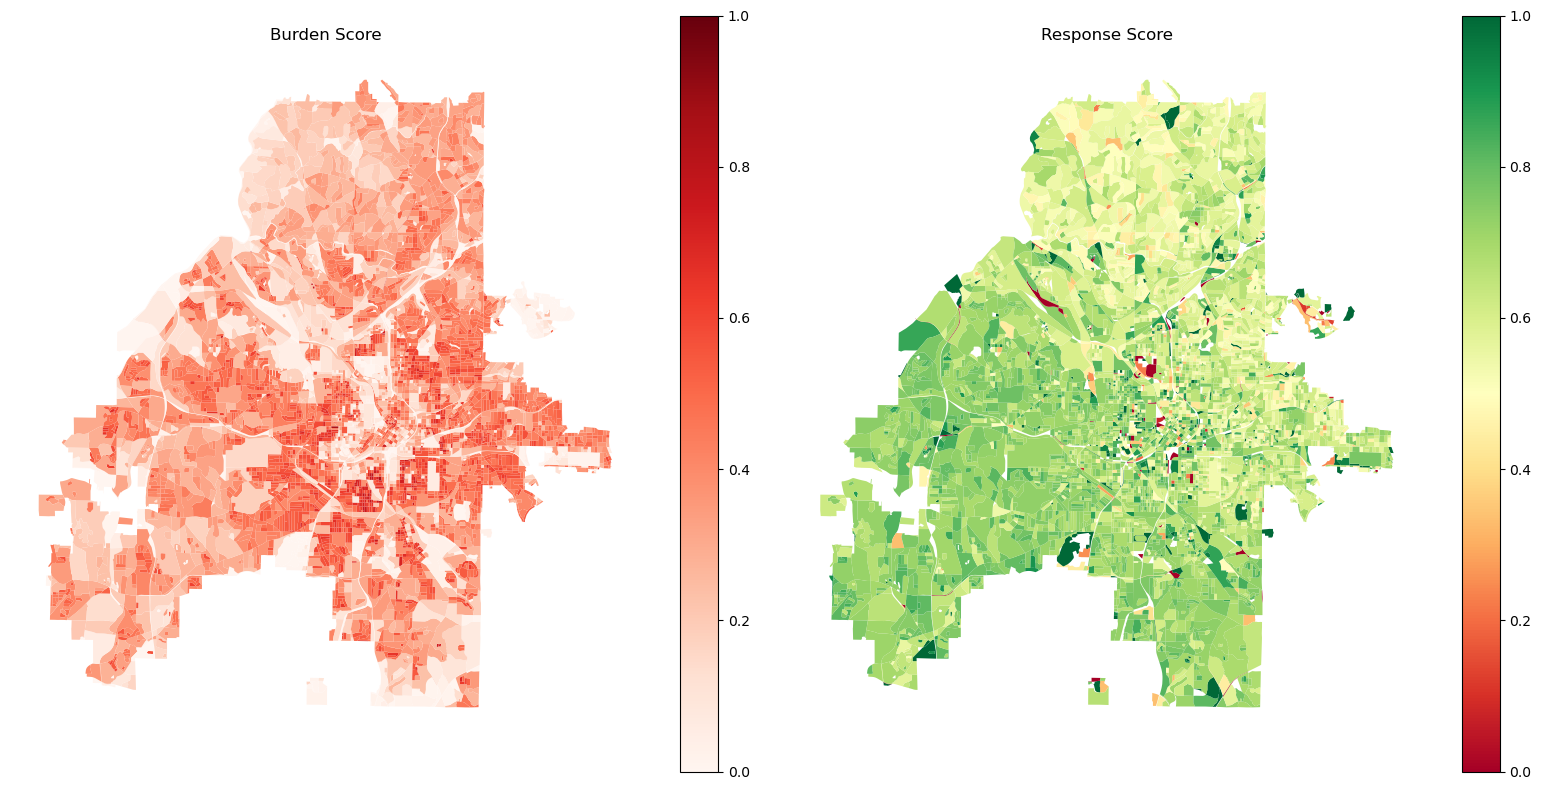

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Burden
atlanta_blocks.plot(
    column="burden_score",
    cmap="Reds",
    linewidth=0,
    legend=True,
    ax=axes[0]
)
axes[0].set_title("Burden Score")
axes[0].axis("off")

# Response
atlanta_blocks.plot(
    column="response_score_norm",
    cmap="RdYlGn",
    linewidth=0,
    legend=True,
    ax=axes[1]
)
axes[1].set_title("Response Score")
axes[1].axis("off")

plt.tight_layout()
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_23328\925949955.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


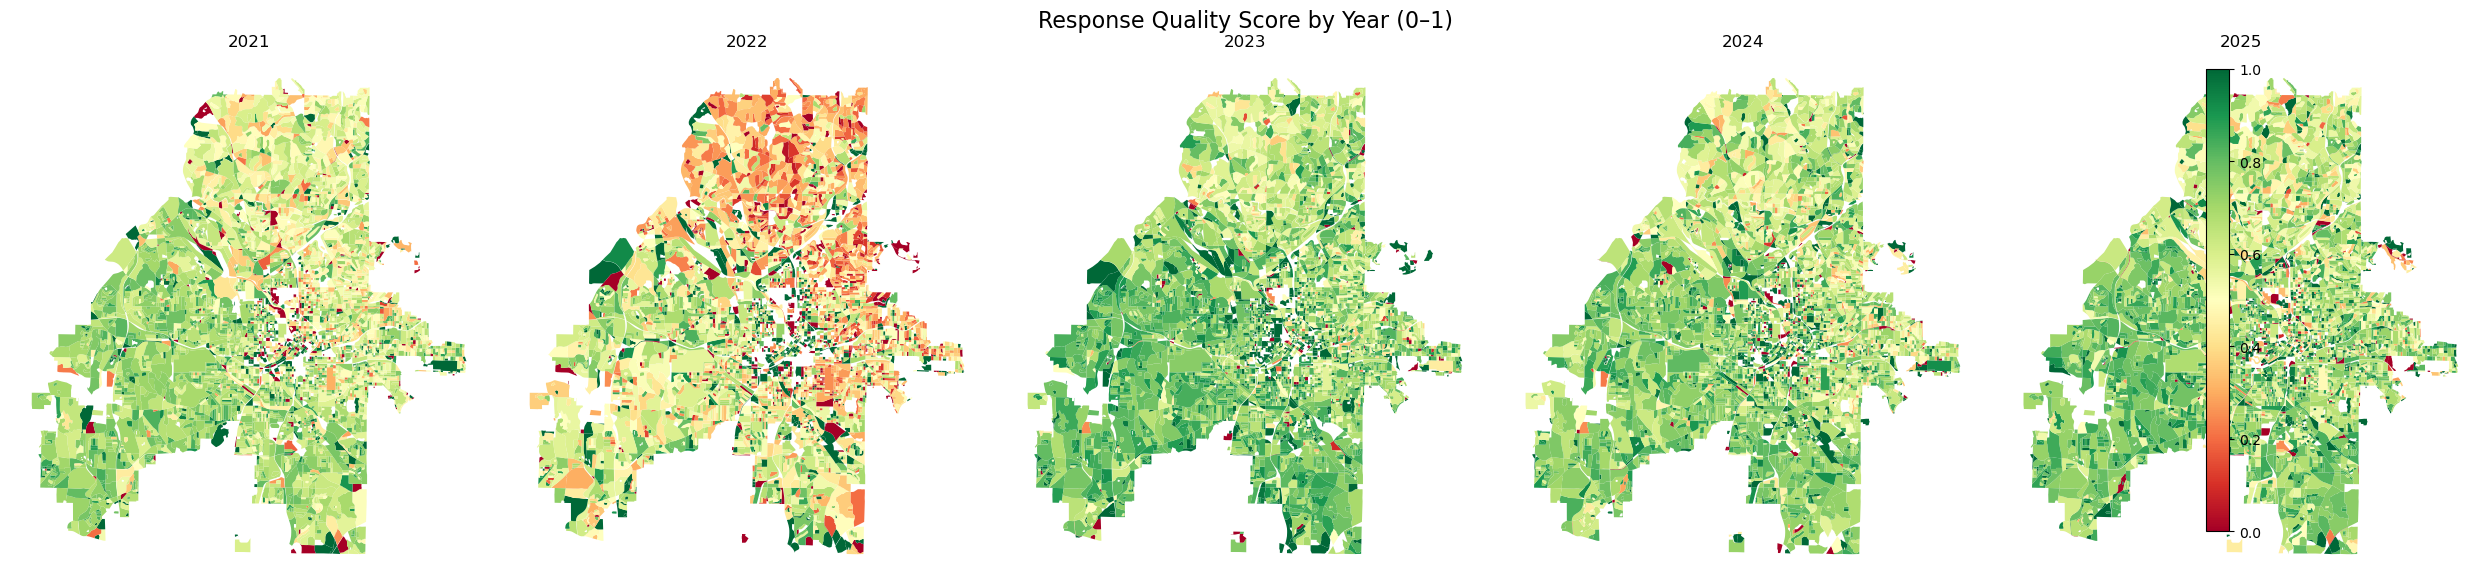

In [42]:
# Yearly trend

years = sorted(gdf_points_atl["year"].unique())
n_years = len(years)

fig, axes = plt.subplots(1, n_years, figsize=(5*n_years, 6))

if n_years == 1:
    axes = [axes]

for i, yr in enumerate(years):
    
    # 1️⃣ Filter year
    yearly_points = gdf_points_atl[gdf_points_atl["year"] == yr]
    
    # 2️⃣ Spatial join
    joined_year = gpd.sjoin(
        yearly_points,
        atlanta_blocks_base,
        how="left",
        predicate="within"
    )
    
    # 3️⃣ Mean response score per block
    block_response = (
        joined_year.groupby("GEOID20")["response_score"]
        .mean()
        .reset_index(name="mean_response_score")
    )
    
    blocks_year = atlanta_blocks_base.merge(
        block_response,
        on="GEOID20",
        how="left"
    )
    
    # Keep only blocks with complaints
    blocks_year = blocks_year.dropna(subset=["mean_response_score"])
    
    # 4️⃣ Normalize within year (observed scaling)
    min_resp = blocks_year["mean_response_score"].min()
    max_resp = blocks_year["mean_response_score"].max()
    
    blocks_year["response_score_norm"] = (
        (blocks_year["mean_response_score"] - min_resp) /
        (max_resp - min_resp)
    )
    
    # 5️⃣ Plot
    blocks_year.plot(
        column="response_score_norm",
        cmap="RdYlGn",
        linewidth=0,
        legend=False,
        ax=axes[i]
    )
    
    axes[i].set_title(str(yr))
    axes[i].axis("off")

# Add shared colorbar
sm = plt.cm.ScalarMappable(cmap="RdYlGn")
sm.set_array([])
fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.02)

plt.suptitle("Response Quality Score by Year (0–1)", fontsize=16)
plt.tight_layout()
plt.show()


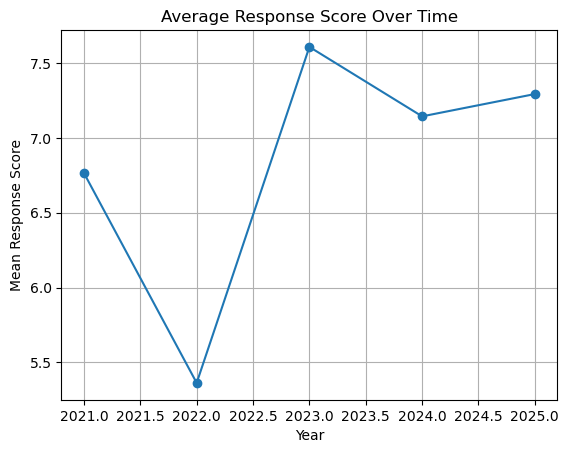

In [43]:
yearly_avg = []

for yr in years:
    mean_score = (
        gdf_points_atl[gdf_points_atl["year"] == yr]
        ["response_score"]
        .mean()
    )
    yearly_avg.append((yr, mean_score))

import pandas as pd
yearly_df = pd.DataFrame(yearly_avg, columns=["year", "avg_response_score"])

plt.plot(yearly_df["year"], yearly_df["avg_response_score"], marker="o")
plt.title("Average Response Score Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Response Score")
plt.grid(True)
plt.show()


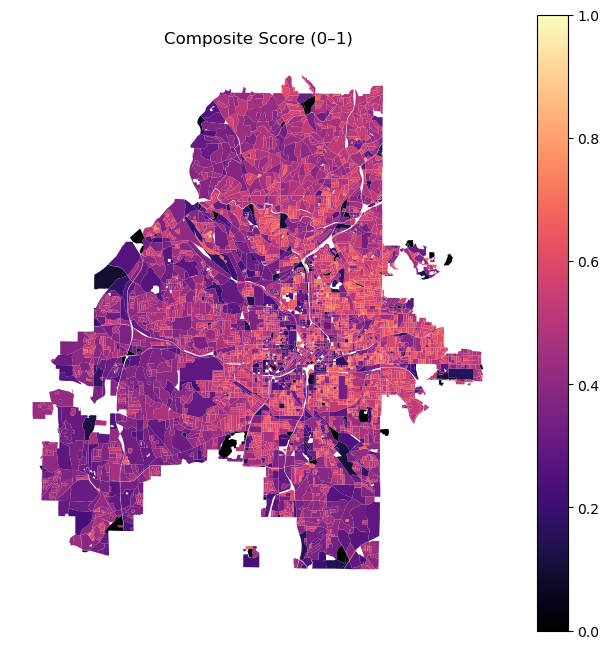

In [54]:
#### Composite score calculation

atlanta_blocks["response_badness"] = (
    1 - atlanta_blocks["response_score_norm"]
)

atlanta_blocks["composite_score_raw"] = (
    atlanta_blocks["burden_score"] +
    atlanta_blocks["response_badness"]
)

min_c = atlanta_blocks["composite_score_raw"].min()
max_c = atlanta_blocks["composite_score_raw"].max()

atlanta_blocks["composite_score"] = (
    (atlanta_blocks["composite_score_raw"] - min_c) /
    (max_c - min_c)
)

fig, ax = plt.subplots(figsize=(8,8))

atlanta_blocks.plot(
    column="composite_score",
    cmap="magma",
    linewidth=0,
    legend=True,
    ax=ax
)

ax.set_title("Composite Score (0–1)")
ax.axis("off")

plt.show()




In [45]:
#### Addition of scores yearly trend

In [48]:
# Corelation of two scores

corr_value = (
    atlanta_blocks[["burden_score", "response_score_norm"]]
    .dropna()
    .corr()
    .iloc[0,1]
)

print("5-Year Correlation:", corr_value)


                     burden_score  response_score_norm
burden_score             1.000000             0.031638
response_score_norm      0.031638             1.000000


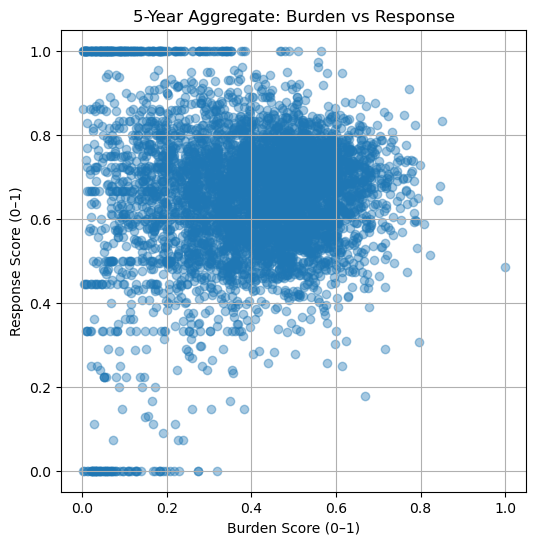

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

plt.scatter(
    atlanta_blocks["burden_score"],
    atlanta_blocks["response_score_norm"],
    alpha=0.4
)

plt.xlabel("Burden Score (0–1)")
plt.ylabel("Response Score (0–1)")
plt.title("5-Year Aggregate: Burden vs Response")

plt.grid(True)
plt.show()


Number of worst blocks: 542


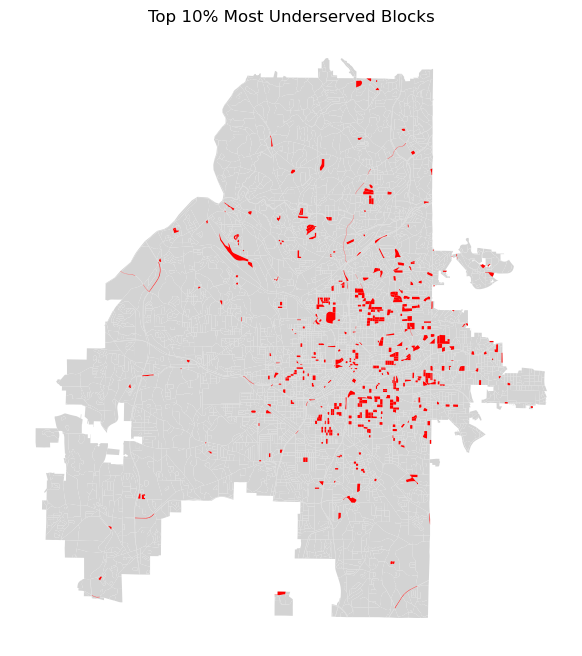

In [55]:
# Top 10% worst performing blocks

threshold = atlanta_blocks["composite_score"].quantile(0.90)

worst_blocks = atlanta_blocks[
    atlanta_blocks["composite_score"] >= threshold
]

print("Number of worst blocks:", len(worst_blocks))

fig, ax = plt.subplots(figsize=(8,8))

atlanta_blocks.plot(color="lightgrey", linewidth=0, ax=ax)
worst_blocks.plot(color="red", linewidth=0, ax=ax)

ax.set_title("Top 10% Most Underserved Blocks")
ax.axis("off")
plt.show()

In [56]:
top_threshold = atlanta_blocks["composite_score"].quantile(0.90)
bottom_threshold = atlanta_blocks["composite_score"].quantile(0.10)

worst_blocks = atlanta_blocks[
    atlanta_blocks["composite_score"] >= top_threshold
]

best_blocks = atlanta_blocks[
    atlanta_blocks["composite_score"] <= bottom_threshold
]

print("Worst blocks:", len(worst_blocks))
print("Best blocks:", len(best_blocks))


Worst blocks: 542
Best blocks: 542


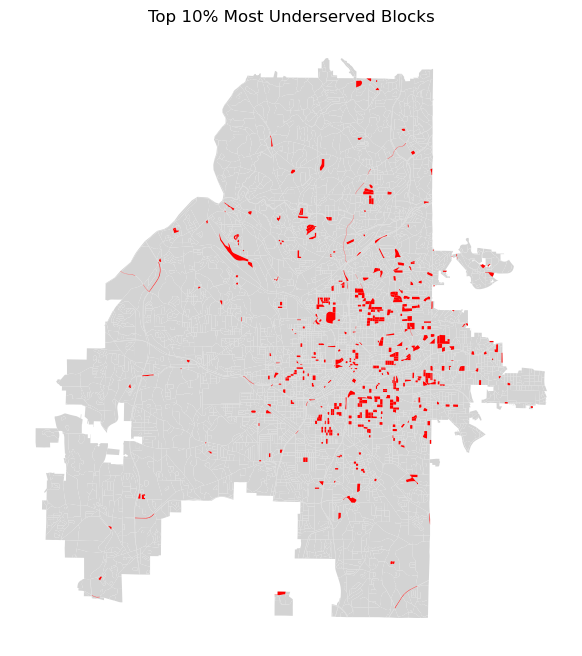

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

atlanta_blocks.plot(color="lightgrey", linewidth=0, ax=ax)
worst_blocks.plot(color="red", linewidth=0, ax=ax)

ax.set_title("Top 10% Most Underserved Blocks")
ax.axis("off")

plt.show()


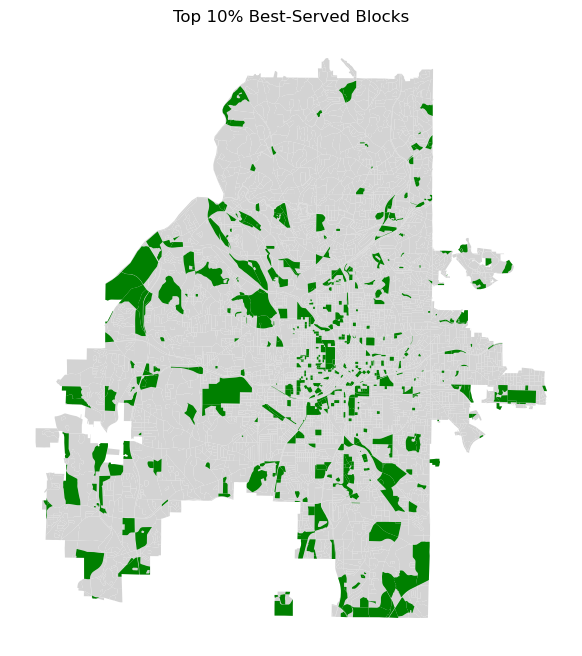

In [58]:
fig, ax = plt.subplots(figsize=(8,8))

atlanta_blocks.plot(color="lightgrey", linewidth=0, ax=ax)
best_blocks.plot(color="green", linewidth=0, ax=ax)

ax.set_title("Top 10% Best-Served Blocks")
ax.axis("off")

plt.show()


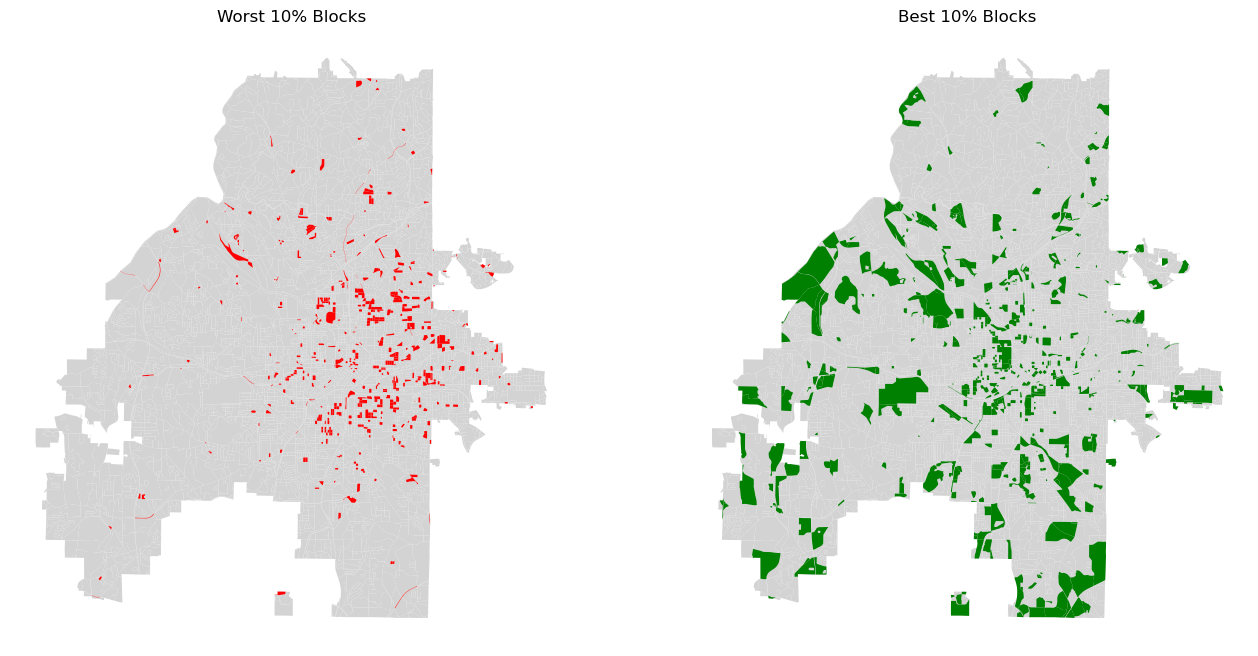

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Worst
atlanta_blocks.plot(color="lightgrey", linewidth=0, ax=axes[0])
worst_blocks.plot(color="red", linewidth=0, ax=axes[0])
axes[0].set_title("Worst 10% Blocks")
axes[0].axis("off")

# Best
atlanta_blocks.plot(color="lightgrey", linewidth=0, ax=axes[1])
best_blocks.plot(color="green", linewidth=0, ax=axes[1])
axes[1].set_title("Best 10% Blocks")
axes[1].axis("off")

plt.show()


In [60]:
print("Worst Blocks Summary:")
print(worst_blocks[["burden_score", "response_score_norm"]].mean())

print("\nBest Blocks Summary:")
print(best_blocks[["burden_score", "response_score_norm"]].mean())


Worst Blocks Summary:
burden_score           0.530259
response_score_norm    0.453624
dtype: float64

Best Blocks Summary:
burden_score           0.143457
response_score_norm    0.870738
dtype: float64
